In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [474]:
!pip install mlxtend

  Using cached mlxtend-0.17.3-py2.py3-none-any.whl (1.3 MB)


In [476]:
!pip install lightgbm

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
bulk = pd.concat([train,test],axis=0)

In [386]:
bulk.shape

(2919, 81)

In [387]:
bulk.isnull().sum()[bulk.isnull().sum()>0]*100/2919

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [388]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
bulk.drop(columns=['Id'],inplace=True)

### Let us divide the dataset into 2 parts, 1 numerical variables, 2 Categorical variables

In [5]:
categorical_columns=[]
numerical_columns=[]

for column in bulk.columns:
    if bulk[column].dtype=='O':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
    

In [6]:
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [7]:
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### Dealing with missing values of Categorical Variables

In [8]:
bulk[categorical_columns].isnull().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [394]:
bulk.FireplaceQu.value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [9]:
bulk.FireplaceQu=bulk.FireplaceQu.fillna('Missing')

In [396]:
bulk.GarageType.value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [10]:
bulk.GarageType=bulk.GarageType.fillna('NoGarage')

In [11]:
bulk.GarageFinish=bulk.GarageFinish.fillna('NoGarage')

In [12]:
bulk.GarageCond=bulk.GarageCond.fillna('NoGarage')
bulk.GarageQual=bulk.GarageQual.fillna('NoGarage')

In [13]:
bulk.BsmtQual=bulk.BsmtQual.fillna('NoBasement')
bulk.BsmtCond=bulk.BsmtCond.fillna('NoBasement')
bulk.BsmtExposure=bulk.BsmtExposure.fillna('NoBasement')
bulk.BsmtFinType1=bulk.BsmtFinType1.fillna('NoBasement')
bulk.BsmtFinType2=bulk.BsmtFinType2.fillna('NoBasement')

In [14]:
bulk.MasVnrType=bulk.MasVnrType.fillna('None')

In [15]:
bulk.PoolQC=bulk.PoolQC.fillna('None')
bulk.Alley=bulk.Alley.fillna('None')
bulk.Fence=bulk.Fence.fillna('None')
bulk.MiscFeature=bulk.MiscFeature.fillna('None')

In [16]:
bulk.Exterior1st=bulk.Exterior1st.fillna('Other')
bulk.Exterior2nd=bulk.Exterior2nd.fillna('Other')

In [17]:
bulk.MSZoning = bulk.MSZoning.fillna(bulk.MSZoning.mode()[0])
bulk.Utilities = bulk.Utilities.fillna(bulk.Utilities.mode()[0])
bulk.Electrical = bulk.Electrical.fillna(bulk.Electrical.mode()[0])
bulk.KitchenQual = bulk.KitchenQual.fillna(bulk.KitchenQual.mode()[0])
bulk.Functional = bulk.Functional.fillna(bulk.Functional.mode()[0])
bulk.SaleType = bulk.SaleType.fillna(bulk.SaleType.mode()[0])


### Dealing with missing values of Numerical Variables

In [405]:
bulk[numerical_columns].isnull().sum()

MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

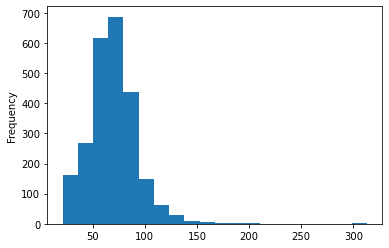

In [406]:
bulk.LotFrontage.plot.hist(bins = 20)

In [18]:
check = bulk.LotFrontage.fillna(bulk.LotFrontage.mean())

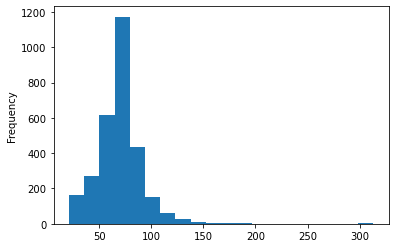

In [408]:
check.plot.hist(bins=20)

In [19]:
bulk['LotFrontage']=bulk.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [20]:
bulk['GarageYrBlt']=bulk['GarageYrBlt'].fillna(0)
bulk['GarageCars']=bulk['GarageCars'].fillna(0)
bulk['GarageArea']=bulk['GarageArea'].fillna(0)
bulk['MasVnrArea']=bulk['MasVnrArea'].fillna(0)
bulk['BsmtFinSF1']=bulk['BsmtFinSF1'].fillna(0)
bulk['BsmtFinSF2']=bulk['BsmtFinSF2'].fillna(0)
bulk['BsmtUnfSF']=bulk['BsmtUnfSF'].fillna(0)
bulk['TotalBsmtSF']=bulk['TotalBsmtSF'].fillna(0)
bulk['BsmtFullBath']=bulk['BsmtFullBath'].fillna(0)
bulk['BsmtHalfBath']=bulk['BsmtHalfBath'].fillna(0)

#### Filling missing values is done

In [411]:
bulk.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [21]:
bulk.MSSubClass.unique()


array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40, 150], dtype=int64)

In [413]:
bulk[['YrSold','GarageYrBlt','YearBuilt','YearRemodAdd']]

,YrSold,GarageYrBlt,YearBuilt,YearRemodAdd
0,2008,2003.0,2003,2003
1,2007,1976.0,1976,1976
2,2008,2001.0,2001,2002
3,2006,1998.0,1915,1970
4,2008,2000.0,2000,2000
...,...,...,...,...
1454,2006,0.0,1970,1970
1455,2006,1970.0,1970,1970
1456,2006,1960.0,1960,1996
1457,2006,0.0,1992,1992


In [22]:
bulk['YrSold']=-bulk['YearBuilt']+bulk['YrSold']
#bulk['GarageYrBlt']=-bulk['YearBuilt']+bulk['GarageYrBlt']
bulk['YearRemodAdd']=-bulk['YearBuilt']+bulk['YearRemodAdd']

In [23]:
### Total bathrooms:

bulk['TotalBathrooms'] = bulk['BsmtFullBath']+0.5*bulk['BsmtHalfBath']+bulk['FullBath']+0.5*bulk['HalfBath']

In [24]:
bulk.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [25]:
bulk[numerical_columns].describe()['WoodDeckSF']

count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64

In [26]:
cont_numerical=[]
for column in numerical_columns:
    if len(bulk[column].unique())>20:
        cont_numerical.append(column)
print(cont_numerical)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'YrSold', 'SalePrice']


In [27]:
categorical_columns
for column in categorical_columns:
    print('{} has {} unique features'.format(column,len(bulk[column].unique())))

MSZoning has 5 unique features
Street has 2 unique features
Alley has 3 unique features
LotShape has 4 unique features
LandContour has 4 unique features
Utilities has 2 unique features
LotConfig has 5 unique features
LandSlope has 3 unique features
Neighborhood has 25 unique features
Condition1 has 9 unique features
Condition2 has 8 unique features
BldgType has 5 unique features
HouseStyle has 8 unique features
RoofStyle has 6 unique features
RoofMatl has 8 unique features
Exterior1st has 16 unique features
Exterior2nd has 16 unique features
MasVnrType has 4 unique features
ExterQual has 4 unique features
ExterCond has 5 unique features
Foundation has 6 unique features
BsmtQual has 5 unique features
BsmtCond has 5 unique features
BsmtExposure has 5 unique features
BsmtFinType1 has 7 unique features
BsmtFinType2 has 7 unique features
Heating has 6 unique features
HeatingQC has 5 unique features
CentralAir has 2 unique features
Electrical has 5 unique features
KitchenQual has 4 unique fe

In [420]:
bulk.Exterior2nd.value_counts()*100/2919

VinylSd    34.737924
MetalSd    15.313464
HdBoard    13.908873
Wd Sdng    13.394998
Plywood     9.249743
CmentBd     4.316547
Wd Shng     2.774923
BrkFace     1.610140
Stucco      1.610140
AsbShng     1.301816
Brk Cmn     0.753683
ImStucc     0.513875
Stone       0.205550
AsphShn     0.137033
CBlock      0.102775
Other       0.068517
Name: Exterior2nd, dtype: float64

In [28]:
bulk.Exterior1st=bulk.Exterior1st.replace(['WdShing','AsbShng','Stucco','BrkComm','CBlock','Stone','AsphShn','ImStucc','Other'],'Rare')

In [29]:
bulk.Exterior2nd=bulk.Exterior2nd.replace(['BrkFace','AsbShng','Stucco','Brk Cmn','CBlock','Stone','AsphShn','ImStucc','Other'],'Rare')

In [30]:
bulk.Neighborhood=bulk.Neighborhood.replace(['StoneBr','SWISU','ClearCr','MeadowV','BrDale','Blmngtn','Veenker','NPkVill','Blueste'],'Rare')

In [31]:
bulk.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBathrooms
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,2,5,WD,Normal,208500.0,3.5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,None,0,5,31,WD,Normal,181500.0,2.5
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0,9,7,WD,Normal,223500.0,3.5
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,0,2,91,WD,Abnorml,140000.0,2.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,0,12,8,WD,Normal,250000.0,3.5


In [32]:
for column in categorical_columns:
    dummy = pd.get_dummies(bulk[column],prefix=column,drop_first=True)
    bulk = pd.concat([bulk,dummy],axis=1)

In [33]:
for column in categorical_columns:
    bulk.drop(columns=column,inplace=True)

In [34]:
bulk.shape

(2919, 238)

In [35]:
bulk['LotArea']=np.log(bulk['LotArea'])
bulk['LotFrontage']=np.log(bulk['LotFrontage'])

In [36]:
bulk['GrLivArea']=np.log(bulk['GrLivArea'])

In [37]:
cont_numerical

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [38]:
train.shape

(1460, 81)

In [39]:
X = bulk.iloc[:1460,:81]

In [40]:
X['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [41]:
test = bulk.iloc[1460:,:81]

In [438]:
Y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

### Outliners

In [42]:
train = train[train.LotFrontage < 300]
train.reset_index(drop=True, inplace=True)
X = X[X.LotFrontage < np.log(300)]
X.reset_index(drop=True, inplace=True)
X = X[X.LotArea < np.log(60000)]
X.reset_index(drop=True, inplace=True)
train = train[train.LotArea < 60000]
train.reset_index(drop=True, inplace=True)
train = train[train.GrLivArea < 4000]
train.reset_index(drop=True, inplace=True)
X = X[X.GrLivArea < np.log(4000)]
X.reset_index(drop=True, inplace=True)

In [43]:
Y = X['SalePrice'].iloc[:1460]

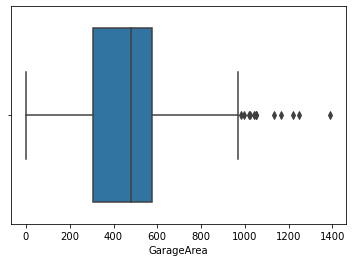

In [44]:
sns.boxplot(x='GarageArea',data=train)

In [45]:
cont_numerical

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [46]:
X.drop(columns=['SalePrice'],inplace=True)


In [47]:
test.drop(columns=['SalePrice'],inplace=True)

In [48]:
Y = np.log(Y)

In [373]:
train.LotArea.describe()

count      1456.000000
mean      10448.784341
std        9860.763449
min        1300.000000
25%        7538.750000
50%        9468.500000
75%       11588.000000
max      215245.000000
Name: LotArea, dtype: float64

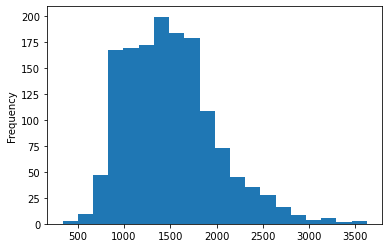

In [368]:
train.GrLivArea.plot.hist(bins = 20)

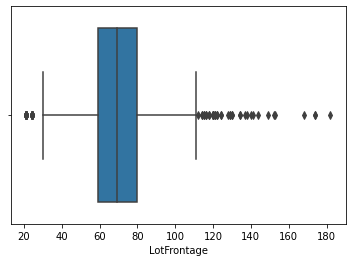

In [379]:
sns.boxplot(x='LotFrontage',data=train)

### Modelling

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
def get_score(model):
    score = np.sqrt(-cross_val_score(model,X,Y,scoring = "neg_mean_squared_error",cv=10)).mean()
    return(score)

##### Ridge

In [50]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [51]:
from sklearn.linear_model import RidgeClassifier,RidgeCV,Ridge,RidgeClassifierCV,LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [457]:
Ridgeregressor = Ridge(alpha=10)
Ridgeregressor.fit(X,Y)
Ridgesol=np.exp(Ridgeregressor.predict(test))
test_org = pd.read_csv('test.csv')
test_id=test_org.iloc[:,0]

final_dataset = pd.DataFrame({'Id':test_id,'SalePrice':Ridgesol})
final_dataset.to_csv('ridge.csv',index=False)

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [55]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [56]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [57]:
score = get_score(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

score = get_score(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

score = get_score(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = get_score(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Ridge: 0.1168 (0.0000)

LASSO: 0.1149 (0.0000)

elastic net: 0.1149 (0.0000)

SVR: 0.1778 (0.0000)



In [58]:
score = get_score(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

score = get_score(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = get_score(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lightgbm score: 0.1157 (0.0000)

GradientBoosting score: 0.1170 (0.0000)

[14:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:45:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:45:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:45:32] WARNING: C:/Users/Administrato

In [59]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,
                                            gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [487]:
X.shape

(1450, 80)

In [60]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(Y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, Y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, Y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, Y)

print('Svr')
svr_model_full_data = svr.fit(X, Y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, Y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, Y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, Y)

START Fit
stack_gen
[14:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/

In [61]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(get_score(model))

0.12167006432123358


In [492]:
final_dataset = pd.DataFrame({'Id':test_id,'SalePrice':np.exp(blend_models_predict(test))})
final_dataset.to_csv('stack.csv',index=False)

In [495]:
stack_gen_model.predict(np.array(test))

array([11.726652 , 11.9907875, 12.118988 , ..., 12.114216 , 11.646889 ,
       12.27349  ], dtype=float32)

In [496]:
final_dataset = pd.DataFrame({'Id':test_id,'SalePrice':np.exp(stack_gen_model.predict(np.array(test)))})
final_dataset.to_csv('stackonly.csv',index=False)

In [489]:
sol = pd.read_csv('stack.csv')

In [491]:
np.exp(sol.SalePrice)

0       122823.675687
1       157819.930636
2       185116.005655
3       195458.461673
4       185010.523736
            ...      
1454     84874.281566
1455     88434.560376
1456    181146.716878
1457    117893.517793
1458    219968.615757
Name: SalePrice, Length: 1459, dtype: float64